In [1]:
import pandas as pd
import sqlite3

sql = """
    SELECT p.*,
           c.category_1 as category, c.category_2 as subcategory
    FROM posts_nlp p, categories c
    WHERE p.subreddit = c.subreddit
    """

with sqlite3.connect('selfposts.db') as con:
    df = pd.read_sql_query(sql,con)

In [2]:
#configs
import numpy as np

# adjust pandas display
pd.options.display.max_columns = 30
pd.options.display.max_rows = 100
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.precision = 2
pd.options.display.max_colwidth = None

In [3]:
# Import matplotlib and seaborn and adjust some defaults
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 100

import seaborn as sns
sns.set_style("whitegrid")

In [4]:
display(str(df.shape))
df.head(5)

'(1013000, 14)'

,index,id,subreddit,title,selftext,selftext_clean,selftext_lemma,selftext_nouns,selftext_adjectives,selftext_verbs,selftext_nav,no_tokens,category,subcategory
0,0,6d8knd,talesfromtechsupport,Remember your command line switches...,"Hi there, <lb>The usual. Long time lerker, first time poster, be kind etc. Sorry if this isn't the right place...<lb><lb>Alright. Here's the story. I'm an independent developer who produces my own software. We're going to call me well, $me.<lb><lb>I work with $dev who helps to produce software with me. We use $PopularVersionControl.<lb><lb>We're trying to remove a branch that was created by mistake. The branch is beta1. We want just beta.<lb><lb>&gt; $me: ""$dev, can you rename that branch because we're going to use just two. I don't want to keep up with 80 quintilian branches."" <lb>&gt; $dev: ""sure, one second.""<lb><lb>Five minutes later...<lb><lb>&gt; $dev: ""[CurseWords] I want beta1 to die!"" <lb>&gt; $me: ""What happened?""<lb><lb>Lots of removed dialog where $dev explains what he did...<lb><lb>&gt; $me: ""Did you try $PopularVersionControl with -u?"" <lb>&gt; $dev: ""[Cursing] That would be why!""<lb><lb>In short. Always check your command line switches...They are important!<lb>","Hi there, \nThe usual. Long time lerker, first time poster, be kind etc. Sorry if this isn't the right place...\n\nAlright. Here's the story. I'm an independent developer who produces my own software. We're going to call me well, $me.\n\nI work with $dev who helps to produce software with me. We use $PopularVersionControl.\n\nWe're trying to remove a branch that was created by mistake. The branch is beta1. We want just beta.\n\n> $me: ""$dev, can you rename that branch because we're going to use just two. I don't want to keep up with 80 quintilian branches."" \n> $dev: ""sure, one second.""\n\nFive minutes later...\n\n> $dev: ""[CurseWords] I want beta1 to die!"" \n> $me: ""What happened?""\n\nLots of removed dialog where $dev explains what he did...\n\n> $me: ""Did you try $PopularVersionControl with -u?"" \n> $dev: ""[Cursing] That would be why!""\n\nIn short. Always check your command line switches...They are important!\n","hi there , \n the usual . long time lerker , first time poster , be kind etc . sorry if this be not the right place ... \n\n alright . here be the story . I be an independent developer who produce my own software . we be go to call I well , $ I . \n\n I work with $ dev who help to produce software with I . we use $ PopularVersionControl . \n\n we be try to remove a branch that be create by mistake . the branch be beta1 . we want just beta . \n\n > $ I : "" $ dev , can you rename that branch because we be go to use just two . I do not want to keep up with 80 quintilian branch . "" \n > $ dev : "" sure , one second . "" \n\n five minute later ... \n\n > $ dev : "" [ cursewords ] I want beta1 to die ! "" \n > $ I : "" what happen ? "" \n\n lot of removed dialog where $ dev explain what he do ... \n\n > $ I : "" do you try $ PopularVersionControl with -u ? "" \n > $ dev : "" [ cursing ] that would be why ! "" \n\n in short . always check your command line switch ... they be important ! \n",time lerker time poster place story developer software dev software PopularVersionControl branch mistake branch beta dev branch branch dev second minute dev beta1 lot dialog dev PopularVersionControl dev command line switch,usual long first kind right independent own beta1 quintilian sure removed short important,produce go call work help produce use try remove create want rename go use want keep want die happen explain do try check,time lerker time poster place story developer software dev software PopularVersionControl branch mistake branch beta dev branch branch dev second minute dev beta1 lot dialog dev PopularVersionControl dev command line switch usual long first kind right independent own beta1 quintilian sure removed short important produce go call work help produce use try remove create want rename go u

In [5]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013000 entries, 0 to 1012999
Data columns (total 14 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   index                1013000 non-null  int64  
 1   id                   1013000 non-null  object 
 2   subreddit            1013000 non-null  object 
 3   title                1013000 non-null  object 
 4   selftext             1013000 non-null  object 
 5   selftext_clean       1013000 non-null  object 
 6   selftext_lemma       1013000 non-null  object 
 7   selftext_nouns       1013000 non-null  object 
 8   selftext_adjectives  1013000 non-null  object 
 9   selftext_verbs       1013000 non-null  object 
 10  selftext_nav         1013000 non-null  object 
 11  no_tokens            1013000 non-null  float64
 12  category             1013000 non-null  object 
 13  subcategory          1013000 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 

None

In [6]:
# select a sample of some data frame columns
df[['id', 'subreddit', 'title', 'selftext_clean']] \
  .sample(2, random_state=42)

,id,subreddit,title,selftext_clean
333618,6gjflh,danganronpa,DanganRonpa RP,"Hello all! Just another DanganRonpa RPer here! Or a host rather, which is what I'm here to talk about. My friend and I are hosting a danganronpa RP on discord and we are looking to recruit new players! If you're interested, here is the link: [DanganRonpa Roleplay]"
850501,5fitbd,Charity,Can you people help me to raise a few hundred bucks?,"I, a computer science and Engineering student from India now turned out to be a no computer engineering student. \n\nMy dad is so old and dont have any savings couldnt help me to buy a computer. If you people could help me raise a few hundred bucks, I would be very grateful to you. \n\nNB: I will pay everyone back if you need it back when I start to earn. After 2.5 years\n\nI dont know whether you will see this, Please help me if you wish to"


In [7]:
len(df)

1013000

In [8]:
df.count()

index                  1013000
id                     1013000
subreddit              1013000
title                  1013000
selftext               1013000
selftext_clean         1013000
selftext_lemma         1013000
selftext_nouns         1013000
selftext_adjectives    1013000
selftext_verbs         1013000
selftext_nav           1013000
no_tokens              1013000
category               1013000
subcategory            1013000
dtype: int64

In [9]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013000 entries, 0 to 1012999
Data columns (total 14 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   index                1013000 non-null  int64  
 1   id                   1013000 non-null  object 
 2   subreddit            1013000 non-null  object 
 3   title                1013000 non-null  object 
 4   selftext             1013000 non-null  object 
 5   selftext_clean       1013000 non-null  object 
 6   selftext_lemma       1013000 non-null  object 
 7   selftext_nouns       1013000 non-null  object 
 8   selftext_adjectives  1013000 non-null  object 
 9   selftext_verbs       1013000 non-null  object 
 10  selftext_nav         1013000 non-null  object 
 11  no_tokens            1013000 non-null  float64
 12  category             1013000 non-null  object 
 13  subcategory          1013000 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 

In [10]:
columns = [col for col in df.columns if not col.startswith('self')]
columns

['index', 'id', 'subreddit', 'title', 'no_tokens', 'category', 'subcategory']

In [11]:
df[['category', 'subcategory', 'subreddit']] \
.describe(include=np.object) \
.transpose()

,count,unique,top,freq
category,1013000,39,video_game,100000
subcategory,1013000,1013,tech support,1000
subreddit,1013000,1013,talesfromtechsupport,1000


In [12]:
df['subreddit'].value_counts()[:10]

talesfromtechsupport    1000
MTVScream               1000
minimalism              1000
Nepal                   1000
ukulele                 1000
ultimate                1000
stevenuniverse          1000
dwarffortress           1000
bangtan                 1000
Korean                  1000
Name: subreddit, dtype: int64

In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
index,1013000.00,506499.50,292428.06,0.00,253249.75,506499.50,759749.25,1012999.00
no_tokens,1013000.00,168.42,135.41,1.00,82.00,120.00,199.00,2103.00


In [14]:
df['category'].nunique()

39

In [15]:
# group by category, count distinct subreddits and posts
cat_df = df.groupby('category') \
           .agg({'subreddit': pd.Series.nunique,
                 'id': pd.Series.count}) \
           .rename(columns={'subreddit': 'num_subreddits',
                            'id': 'num_posts'}) \
           .sort_values('num_subreddits', ascending=False)
            
# show top 5 records
cat_df.head(5)

,num_subreddits,num_posts
category,,
video_game,100,100000
tv_show,68,68000
health,58,58000
profession,56,56000
software,52,52000


In [16]:
cat_df.describe()

,num_subreddits,num_posts
count,39.00,39.00
mean,25.97,25974.36
std,19.76,19759.72
min,5.00,5000.00
25%,13.50,13500.00
50%,20.00,20000.00
75%,29.50,29500.00
max,100.00,100000.00


<AxesSubplot:>

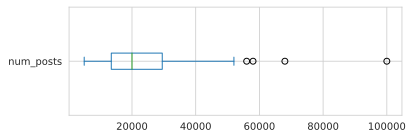

In [17]:
cat_df[['num_posts']].plot(kind='box', vert=False, figsize=(6,2))

<AxesSubplot:>

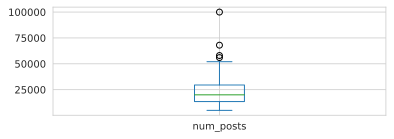

In [18]:
cat_df[['num_posts']].plot(kind='box', vert=True, figsize=(6,2))

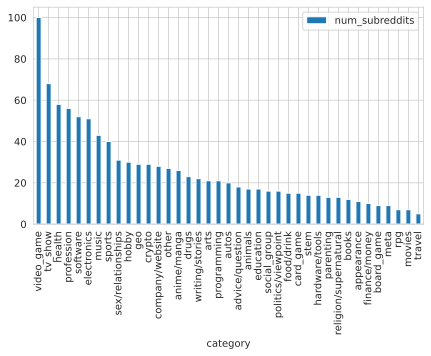

In [19]:
cat_df[['num_subreddits']].plot(kind='bar', figsize=(7,4));

In [20]:
sub_df = df[df['subreddit']=='TheSimpsons']

sub_df[['selftext_clean', 'selftext_nouns']].sample(2)

,selftext_clean,selftext_nouns
205898,"Hey guys! I'm looking for a scene where Homer walks into the kitchen, kind of leaned back, arms swinging, ""walking cool,"" and goes ""'sup Marge."" Does this exist? It's really funny to me every time I think about it because it's never commented on, like it's not an episode where Homer has become cool or anything, he just says ""sup Marge."" I've already tried Frinkiac/Google, but it's kind of a hard scene to look up (like, what if he actually said ""yo Marge"" and I'm misremembering???), so I haven't had any luck. I'm going to be really humiliated if it's in like, Monorail or something, so if it's in a really classic episode, just lie to me and say it doesn't exist! Thanks.",guy scene Homer kitchen arm swinging sup Marge time episode Homer sup Marge Frinkiac Google scene yo Marge luck Monorail episode thank
140230,"I must leave you. Why I cannot say. Where I am going you cannot know. How I will get there I haven't decided yet. But one thing I can tell you, any time I hear the wind blow it will whisper the name... Edna. And so let us part with a love that will echo through the ages. \n\nWoodrow.",thing time wind blow name Edna love age Woodrow


In [21]:
def my_tokenizer(text):
    return text.split() if text != None else []

In [22]:
tokens = sub_df.selftext_nouns.map(my_tokenizer).sum()

In [23]:
print(tokens[:200])

['episode', 'time', 'other', 'instance', 'Proposal', 'Putlocker', 'week', 'tv', 'Bart', 'Thanksgiving', 'episode', 'other', 'show', 'girlfriend', 'kid', 'point', 'go', 'show', 'movie', 'thing', 'reference', 'continuity', 'quality', 'reference', 'back', 'movie', 'season', 'Shot', 'Mr.', 'Burns', 'joke', 'consequence', 'callback', 'order', 'problem', 'quality', 'matching', 'movie', 'lot', 'episode', 'show', 'point', 'season', 'dip', 'movie', 'end', 'cap', 'movie', 'cartooniness', 'vibe', 'show', 'hour', 'episode', 'head', 'while', 'guy', 'hope', 'year', 'Lisa', 'creepy', 'boy', 'school', 'parent', 'stuff', 'episode', 'treehouse', 'horror', 'idea', 'idea', 'episode', 'Elijah', 'Wood', 'guest', 'show', '¯\\', 'ツ', 'post', 'time', 'episode', 'episode', 'City', 'New', 'York', 'season', 'episode', 'Youtube', 'min', 'clip', 'Homer', 'car', 'garage', 'Marge', 'homer', 'chore', 'paper', 'car', 'episode', 'name', 'episode', 'Homer', 'bully', 'Kearney', 'joke', 'Homer', 'line', 'guy', 'thank', 'ep

In [24]:
from collections import Counter

counter = Counter(tokens)
counter.most_common(20)

[('episode', 1216),
 ('Simpsons', 601),
 ('Homer', 494),
 ('season', 492),
 ('show', 327),
 ('Bart', 320),
 ('time', 221),
 ('character', 214),
 ('scene', 211),
 ('Lisa', 210),
 ('year', 198),
 ('thing', 142),
 ('Marge', 140),
 ('joke', 135),
 ('people', 133),
 ('guy', 132),
 ('way', 120),
 ('one', 118),
 ('homer', 114),
 ('Simpson', 111)]

In [25]:
df.category.unique()

array(['writing/stories', 'tv_show', 'autos', 'hardware/tools',
       'electronics', 'video_game', 'crypto', 'sports', 'hobby',
       'appearance', 'card_game', 'drugs', 'advice/question',
       'social_group', 'anime/manga', 'sex/relationships', 'software',
       'health', 'other', 'animals', 'arts', 'programming', 'rpg',
       'books', 'parenting', 'education', 'company/website', 'profession',
       'music', 'politics/viewpoint', 'stem', 'travel', 'geo',
       'religion/supernatural', 'board_game', 'movies', 'food/drink',
       'finance/money', 'meta'], dtype=object)

In [26]:
from spacy.lang.en.stop_words import STOP_WORDS

def remove_stopwords(tokens):
    """Remove stopwords from a list of tokens."""
    return [t for t in tokens if t not in STOP_WORDS]

counter = Counter(remove_stopwords(tokens))

<AxesSubplot:xlabel='token'>

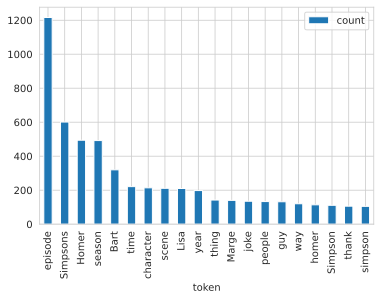

In [27]:
freq_df = pd.DataFrame.from_records(counter.most_common(20),
                                   columns=['token', 'count'])

freq_df.plot(kind='bar', x='token')

In [28]:
from wordcloud import WordCloud

def wordcloud(counter):
    """A small wordloud wrapper"""
    wc = WordCloud(width=1200, height=800, 
                   background_color="white", 
                   max_words=200) 
    wc.generate_from_frequencies(counter)

    # Plot
    fig=plt.figure(figsize=(6, 4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

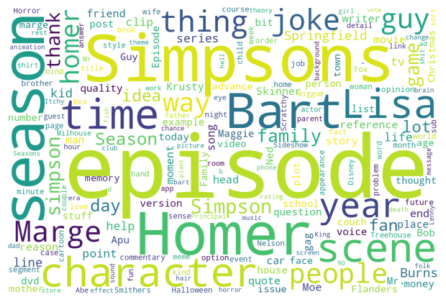

In [29]:
wordcloud(counter)

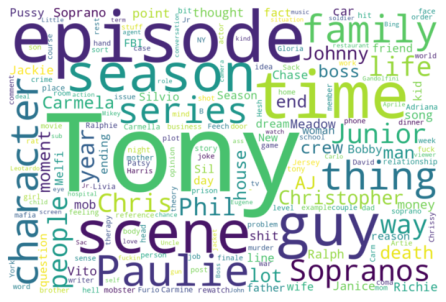

In [30]:
tokens2 = df[df['subreddit']=='thesopranos'].selftext_nouns \
            .map(my_tokenizer).sum()

counter2 = Counter(remove_stopwords(tokens2))
wordcloud(counter2)

<AxesSubplot:xlabel='category'>

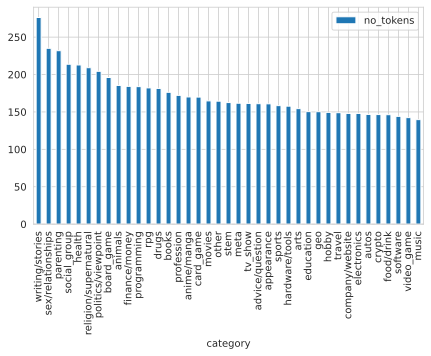

In [31]:
df.groupby(['category']) \
    .agg({'no_tokens':'mean'}) \
    .sort_values(by='no_tokens', ascending=False) \
    .plot(kind='bar', figsize=(7,4))

In [32]:
%config InlineBackend.figure_format = 'retina'

import seaborn as sns

def multi_boxplot(data, x, y, ylim = None):
    '''Wrapper for sns boxplot with cut-off functionality'''
    # plt.figure(figsize=(30, 5))
    fig, ax = plt.subplots()
    plt.xticks(rotation=90) 

    # order boxplots by median
    ordered_values = data.groupby(x)[[y]] \
                         .median() \
                         .sort_values(y, ascending=False) \
                         .index
        
    sns.boxplot(x=x, y=y, data=data, palette='Set2', 
                order=ordered_values)

    fig.set_size_inches(11, 6)
    
    # cut-off y-axis at value ylim
    ax.set_ylim(0, ylim)

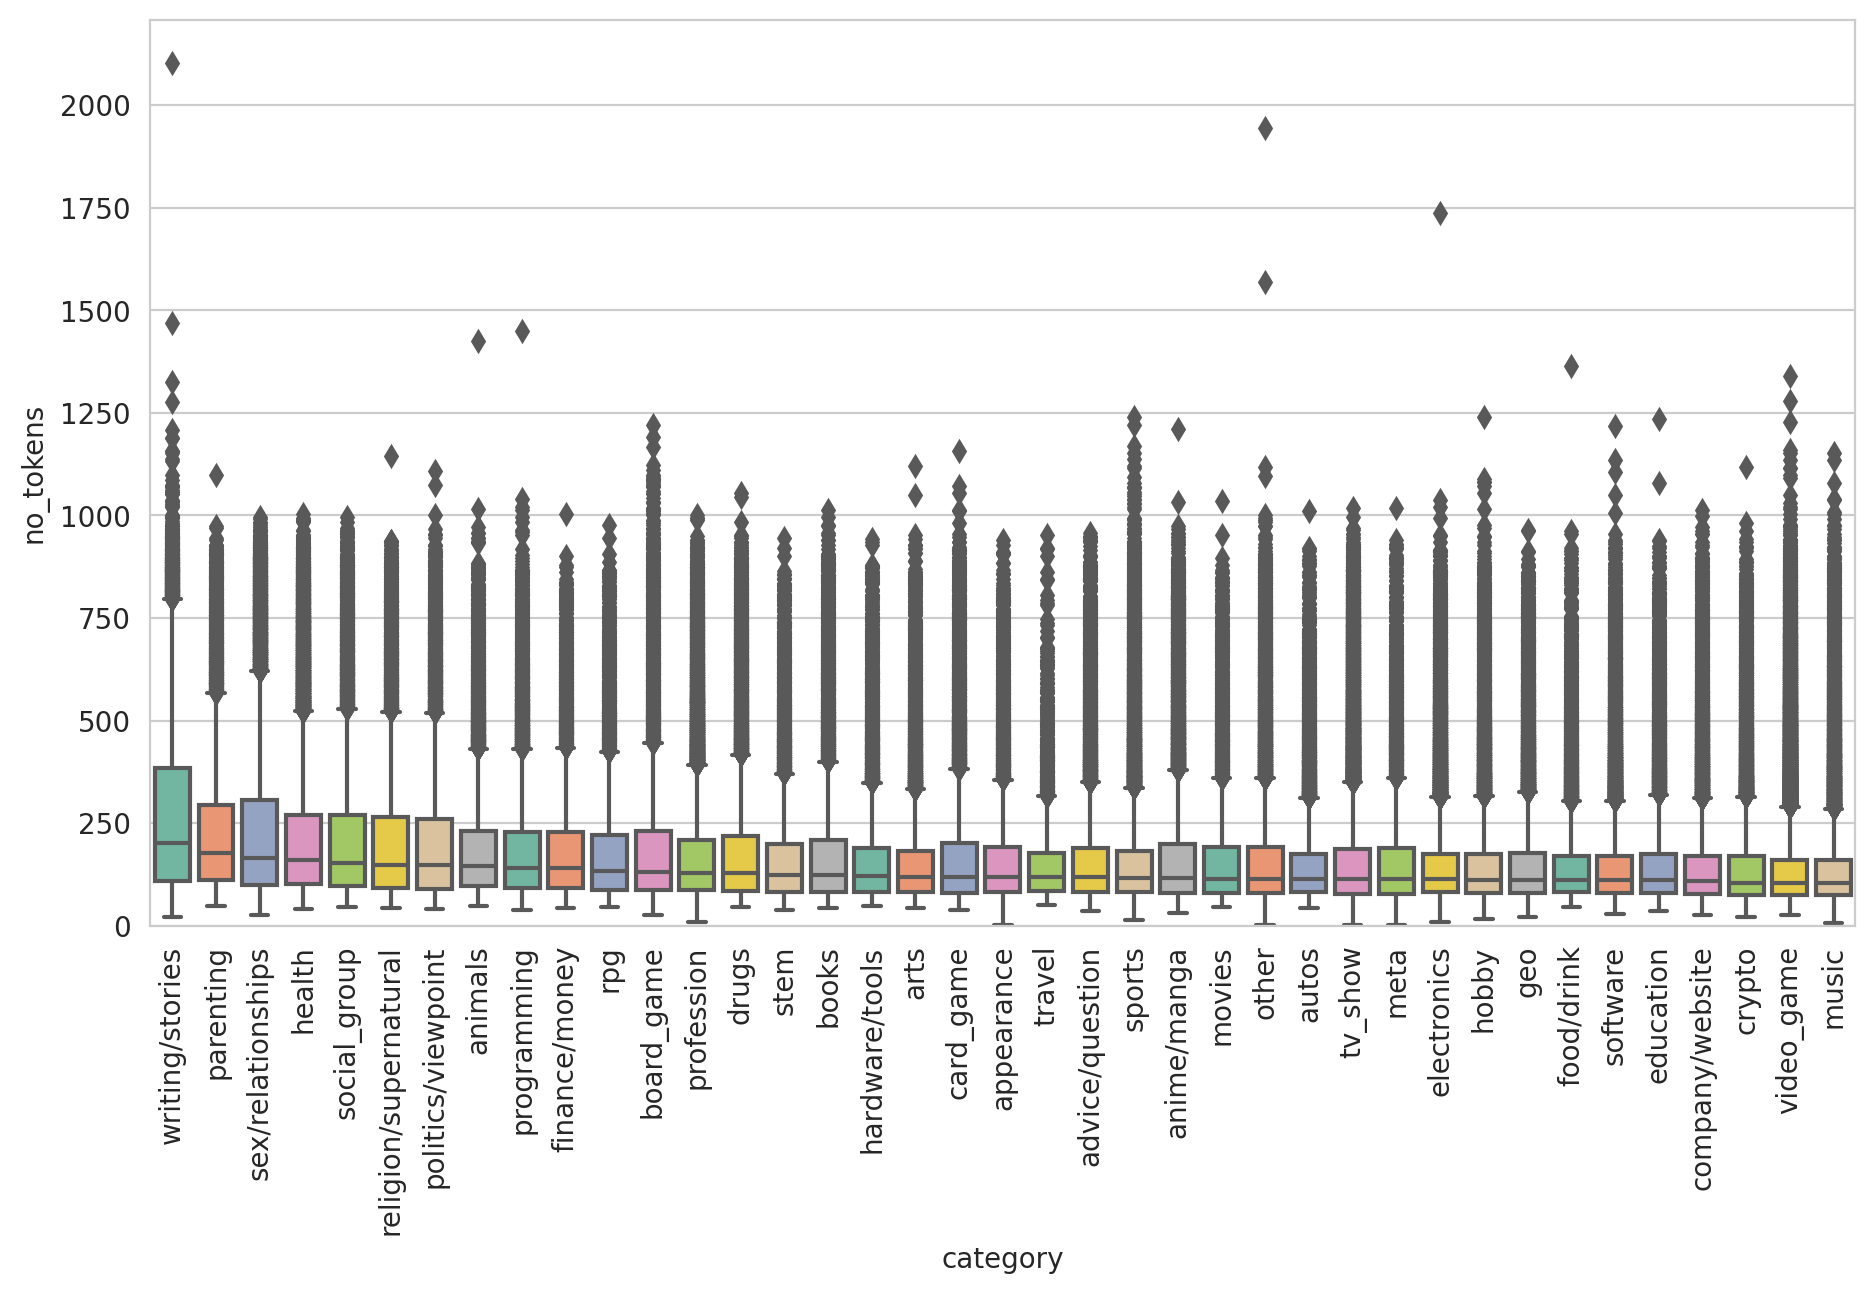

In [33]:
multi_boxplot(df, 'category', 'no_tokens');

In [34]:
df['selftext_lemma'][df.no_tokens > 1400]

237498                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             here be a IKEV1 site to site tunnel I have set up . \n\n ASA1 \n\n define object * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * \n object network OBJ 172.29.2.0 \n \isubnet 172

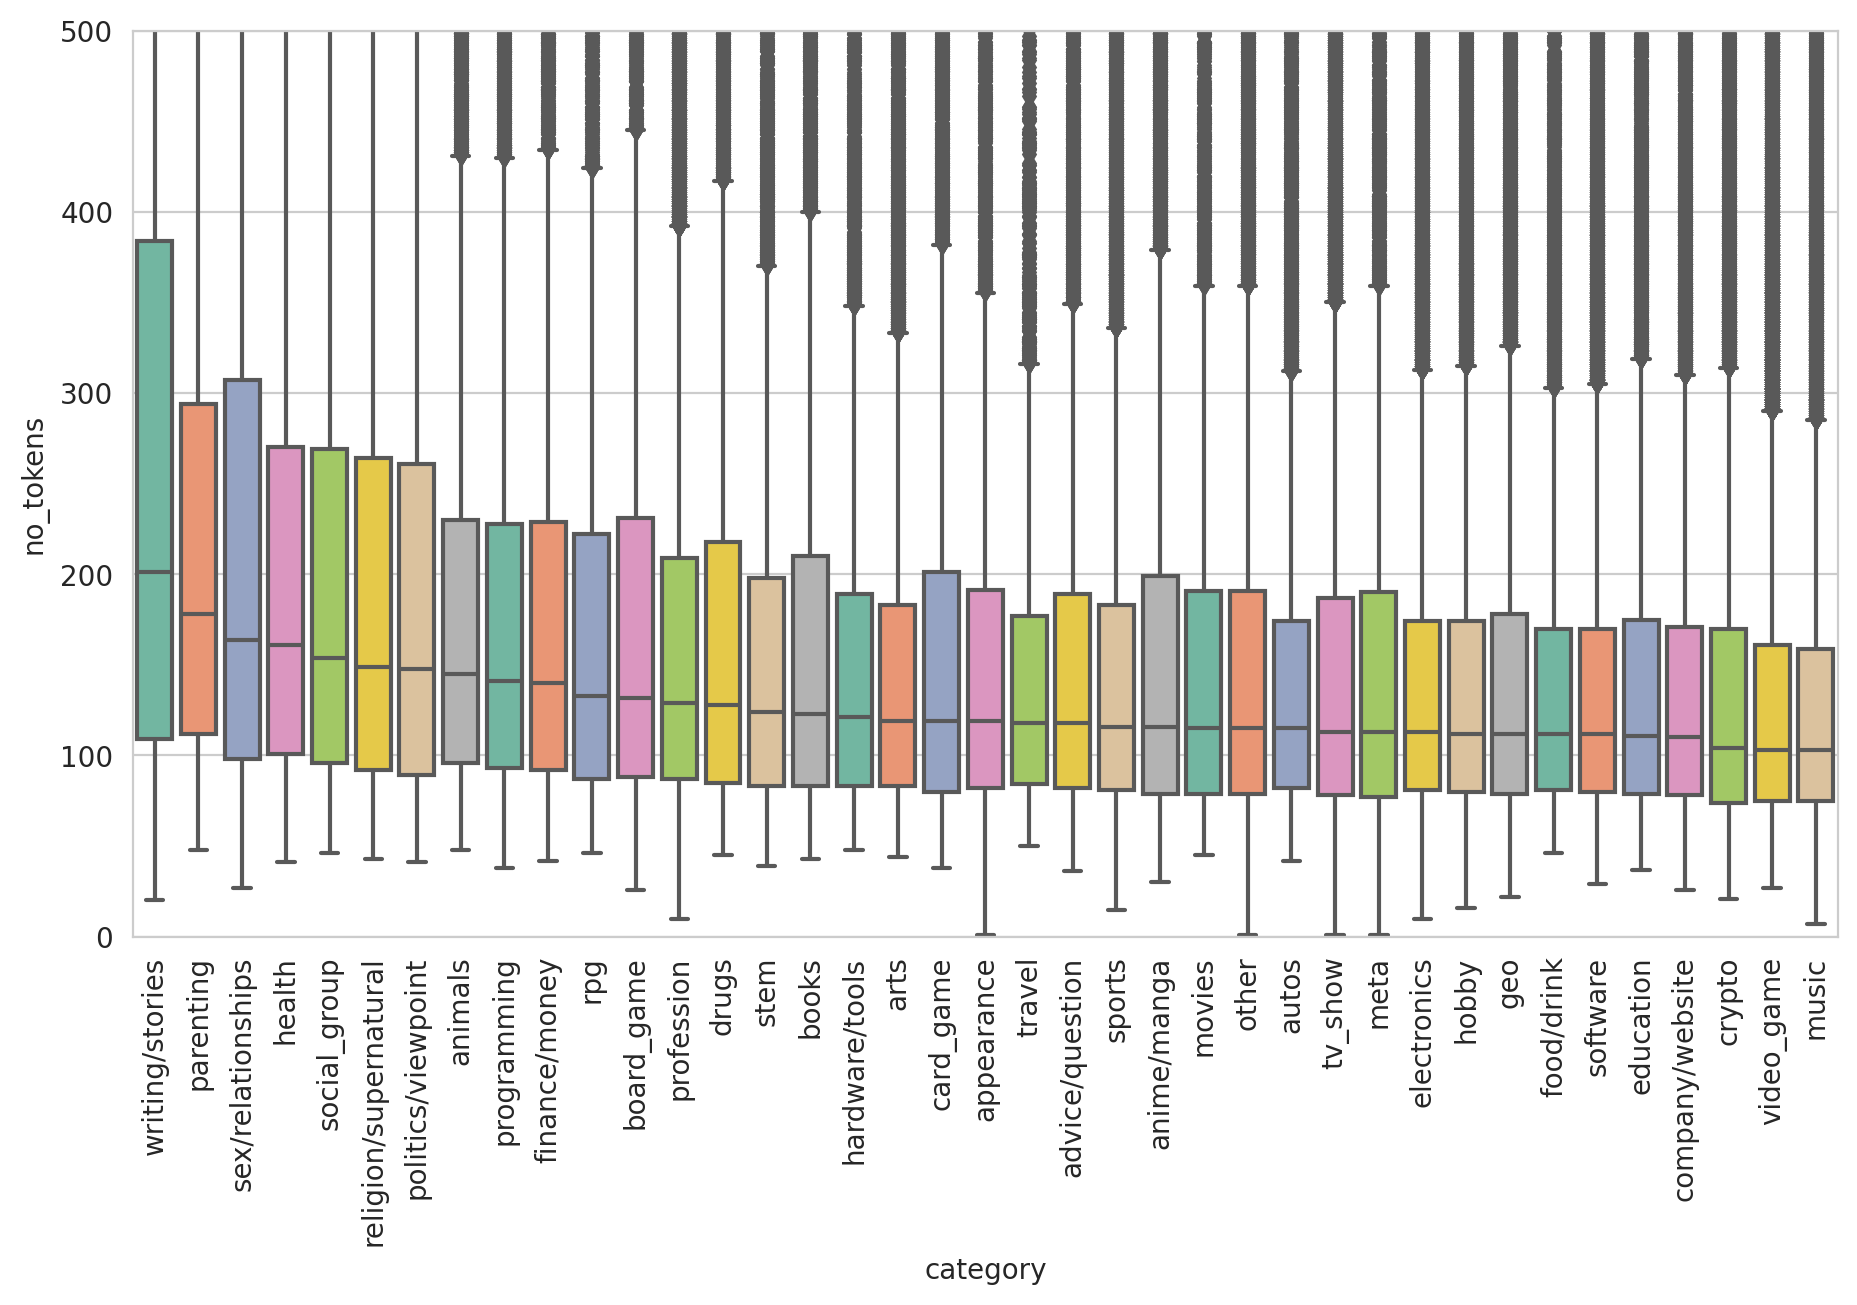

In [35]:
multi_boxplot(df, 'category', 'no_tokens', ylim=500)

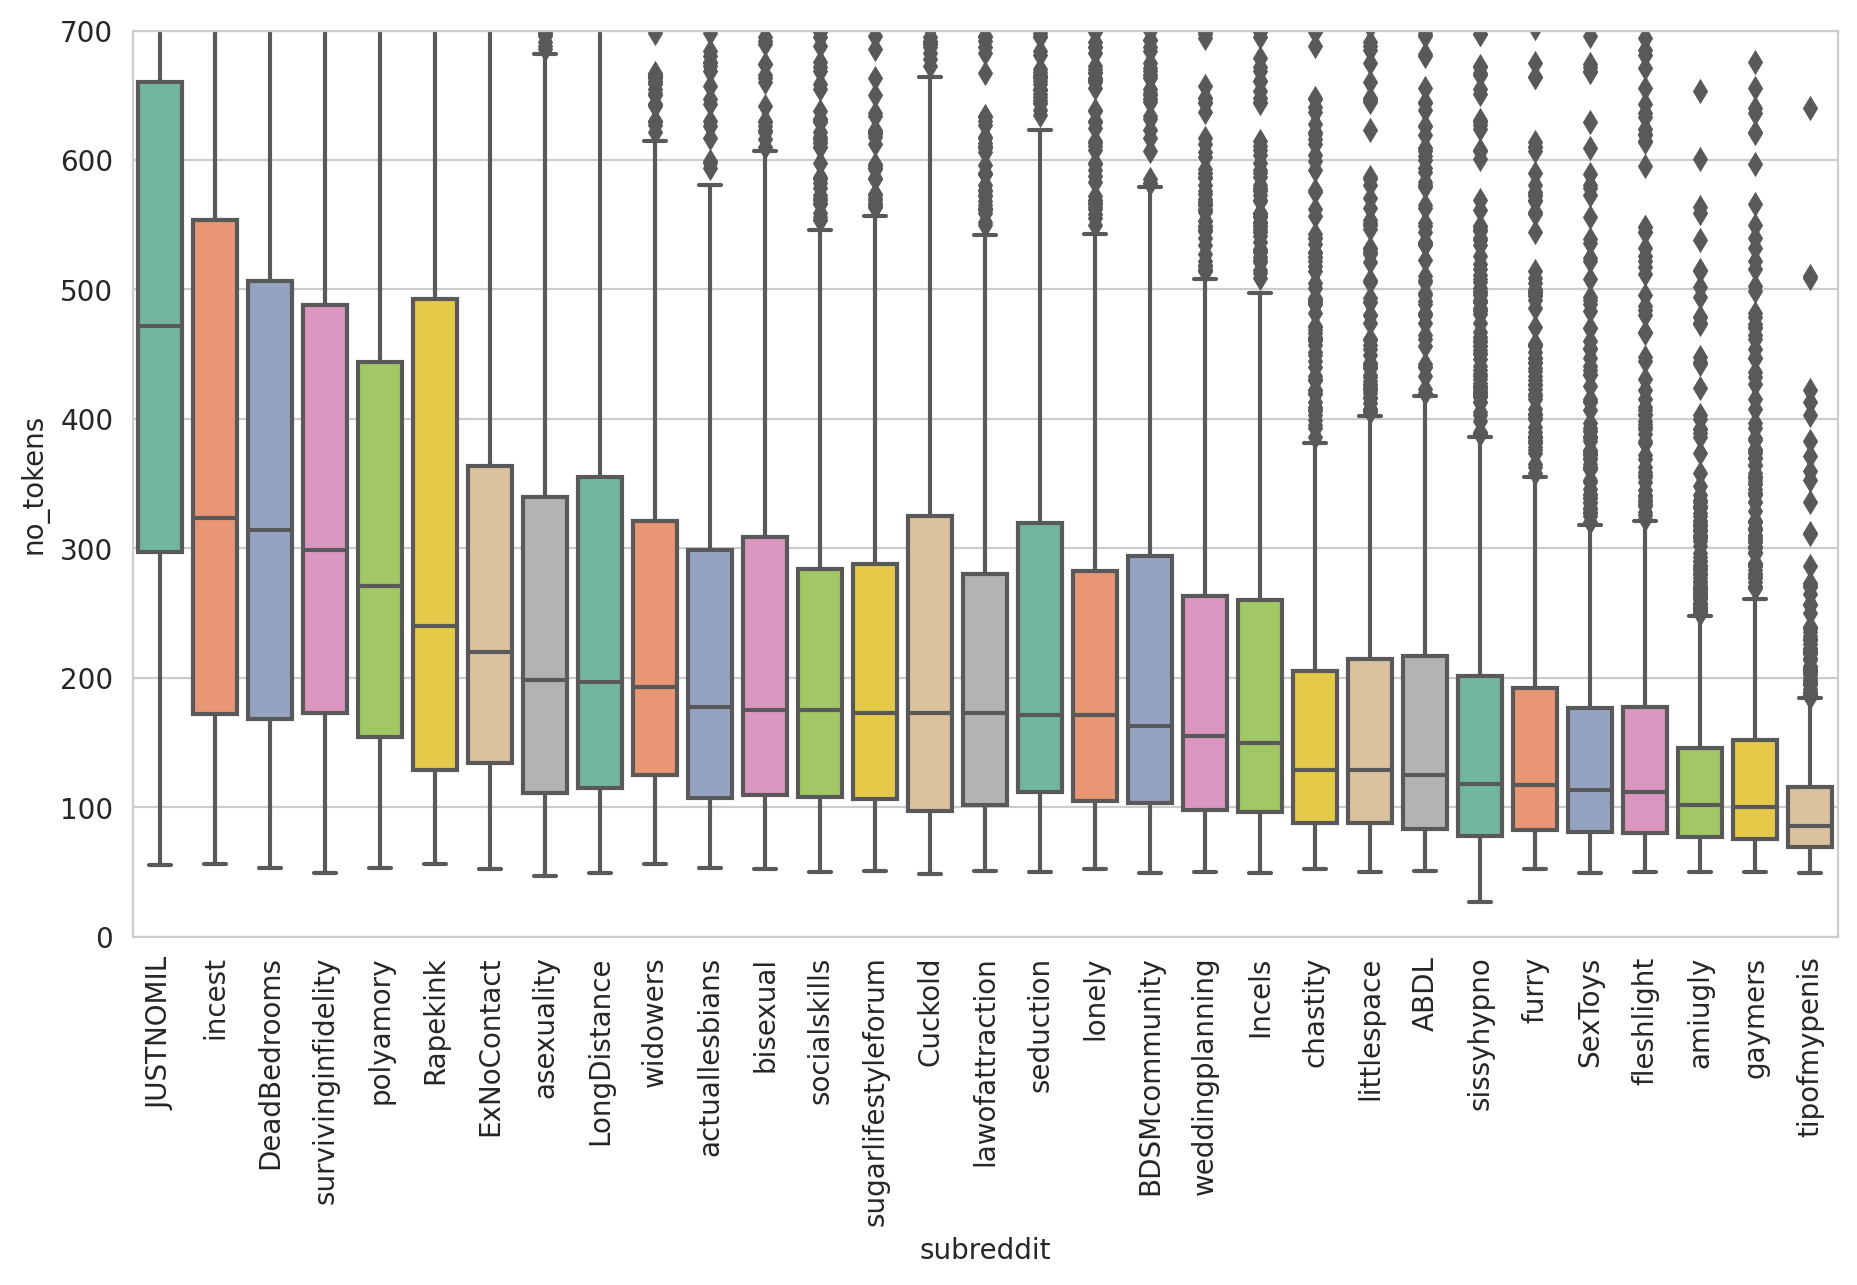

In [36]:
multi_boxplot(df[df.category=='sex/relationships'],
                 'subreddit', 'no_tokens', ylim=700)
#multi_boxplot(df[df.category=='sex/relationships'], 
#              'subreddit', 'no_tokens', ylim=700)

In [37]:
#DB is 6GB. Experiment with compacting
con.execute("VACUUM")
con.close()
#after vacuum still 6gb. more experiments needed